# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Oprah Winfrey
- Miley Cyrus
- Sam Smith
- J. Cole

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
tmdb_df = pd.read_csv('tmdb_5000_movies.csv')
tmdb_df2 = pd.read_csv('movies_metadata.csv')


/Users/chengcheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def trim_genres(genres):
    g_list = []
    b = 0
    a = 0
    while (a != -1 and b != -1):
        a = genres.find("name")
        b = genres.find("}")
        g_list.append(genres[a+8:b-1])
        genres = genres [b+1:]
        if (len(genres) == 1):
            break
    g_list.sort()
    return g_list

In [4]:
tmdb_df = tmdb_df.drop(columns = ['homepage','id','production_companies','keywords','overview','tagline','status', 'original_title','spoken_languages'])
tmdb_df = tmdb_df.dropna()
tmdb_df['genres'] = tmdb_df['genres'].apply(trim_genres)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(trim_genres)
tmdb_df['genres'] = tmdb_df['genres'].apply(tuple)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(tuple)

In [5]:
tmdb_df2 = tmdb_df2.drop(columns = ['adult','belongs_to_collection','homepage', 'id', 'imdb_id','status', 'tagline','video','original_title','poster_path','production_companies','spoken_languages','overview' ])
tmdb_df2 = tmdb_df2.dropna()
tmdb_df2['genres'] = tmdb_df2['genres'].apply(trim_genres)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(trim_genres)
tmdb_df2['genres'] = tmdb_df2['genres'].apply(tuple)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(tuple)
tmdb_df2 = tmdb_df2.fillna(0)
tmdb_df2.budget = tmdb_df2.budget.astype(np.int64)
tmdb_df2.popularity = tmdb_df2.popularity.astype(np.float64)
tmdb_df2.revenue = tmdb_df2.revenue.astype(np.int64)
tmdb_df2.vote_count = tmdb_df2.vote_count.astype(np.int64)



In [6]:
merge_df = pd.merge(tmdb_df,tmdb_df2,on = ['budget','genres','original_language','popularity','production_countries','release_date','revenue','runtime','title','vote_average','vote_count'] , how = 'outer')
merge_df = merge_df[merge_df['revenue'] != 0]
merge_df = merge_df.drop_duplicates(subset = 'title', keep = 'first')
merge_df=merge_df[['title','genres','original_language','production_countries','release_date','runtime','popularity','vote_count','vote_average','budget','revenue']]
merge_df.to_csv('trimmed_data.csv')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Data set sorted according to the revenue

In [7]:
df = pd.read_csv('trimmed_data.csv',index_col = 0)


In [8]:
df = df.sort_values(by = ['revenue'],ascending=False)
df.head(5)

,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United Kingdom', 'United States of America')",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
31274,Star Wars: The Force Awakens,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United States of America',)",2015-12-15,136.0,31.626013,7993,7.5,245000000,2068223624
25,Titanic,"('Drama', 'Romance', 'Thriller')",en,"('United States of America',)",1997-11-18,194.0,100.025899,7562,7.5,200000000,1845034188
16,The Avengers,"('Action', 'Adventure', 'Science Fiction')",en,"('United States of America',)",2012-04-25,143.0,144.448633,11776,7.4,220000000,1519557910
28,Jurassic World,"('Action', 'Adventure', 'Science Fiction', 'Th...",en,"('United States of America',)",2015-06-09,124.0,418.708552,8662,6.5,150000000,1513528810


## Movie genres of the top 50 revenues

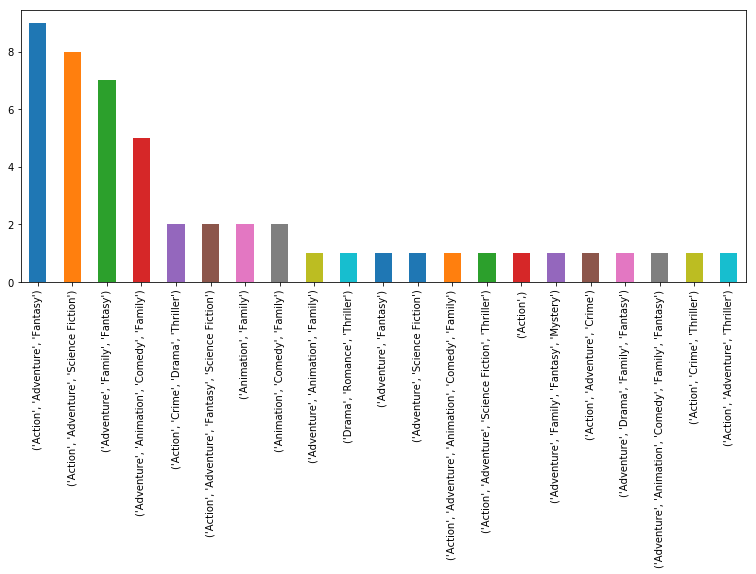

In [9]:
pd.value_counts(df.head(50)['genres']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

## Linear Model Of Movie Genres and Revenue

In [10]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~genres",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     4.506
Date:                Sat, 01 Jun 2019   Prob (F-statistic):          6.93e-257
Time:                        12:52:28   Log-Likelihood:            -1.4508e+05
No. Observations:                7254   AIC:                         2.918e+05
Df Residuals:                    6450   BIC:                         2.973e+05
Df Model:                         803                                         
Covariance Type:            nonrobust                                         
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Movie production countries from top 100 movie revenues

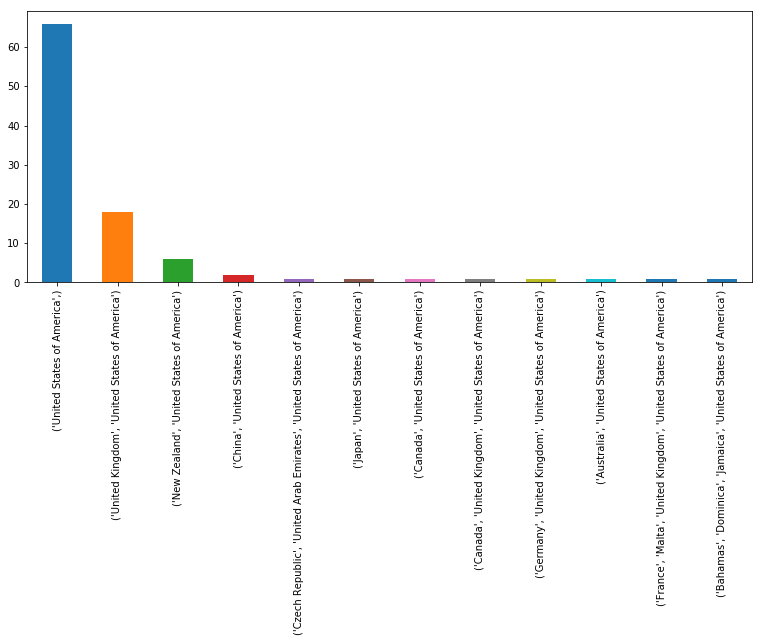

In [11]:
pd.value_counts(df.head(100)['production_countries']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

In [12]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~production_countries",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.526
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           6.27e-13
Time:                        12:52:29   Log-Likelihood:            -1.4627e+05
No. Observations:                7254   AIC:                         2.936e+05
Df Residuals:                    6715   BIC:                         2.973e+05
Df Model:                         538                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                            coef    std err       

## Relation between the title length and revenue

In [13]:
lenth_rev = df[['title','revenue']]
lenth_rev['title'] = lenth_rev['title'].apply(len)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
a1, b1 = np.polyfit(lenth_rev['title'], lenth_rev['revenue'], 1)
title_len = np.arange(0,80,dtype = 'float')
pred_rev = title_len * a1 + b1

Text(0, 0.5, 'revenue')

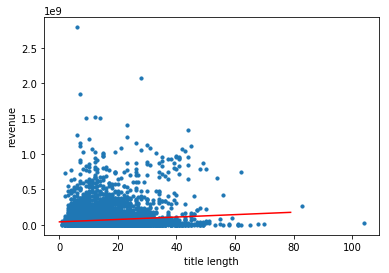

In [15]:
plt.scatter(x = lenth_rev['title'], y = lenth_rev['revenue'], s=10)
plt.plot(title_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('title length')
plt.ylabel('revenue')

In [16]:
lenth_rev.rename(columns={'title':'title_len'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~title_len",lenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     69.34
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           9.83e-17
Time:                        12:52:30   Log-Likelihood:            -1.4666e+05
No. Observations:                7254   AIC:                         2.933e+05
Df Residuals:                    7252   BIC:                         2.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.306e+07   3.55e+06     12.138      0.0

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Relation between the movie runtime and revenue

Text(0, 0.5, 'revenue')

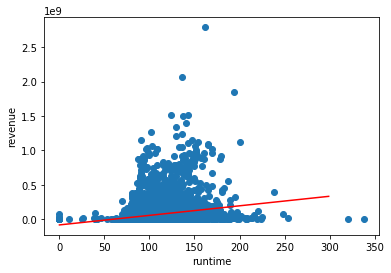

In [17]:
timelenth_rev = df[['runtime','revenue']]
a, b = np.polyfit(timelenth_rev['runtime'], timelenth_rev['revenue'], 1)
time_len = np.arange(0,300,dtype = 'float')
pred_rev = a * time_len + b 
plt.scatter(x = timelenth_rev['runtime'], y = timelenth_rev['revenue'])
plt.plot(time_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('runtime')
plt.ylabel('revenue')

In [18]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~runtime",timelenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     313.8
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           9.01e-69
Time:                        12:52:30   Log-Likelihood:            -1.4654e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7252   BIC:                         2.931e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.039e+07    8.6e+06     -9.352      0.0

## Movie release month of top 50 movie revenues

In [19]:
date_rev = df[['release_date','revenue']]
date_rev['release_date']=date_rev['release_date'].str[5:7]

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


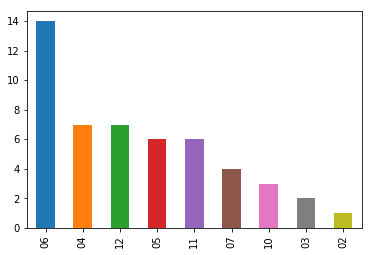

In [20]:
pd.value_counts(date_rev.head(50)['release_date']).plot.bar()
f1 = plt.gcf()

In [21]:
date_rev.rename(columns={'release_date':'release_month'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~release_month",date_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     26.24
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           2.99e-54
Time:                        12:52:31   Log-Likelihood:            -1.4655e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7242   BIC:                         2.932e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.213e+07   6

## Relation between the vote average and revenue

Text(0, 0.5, 'revenue')

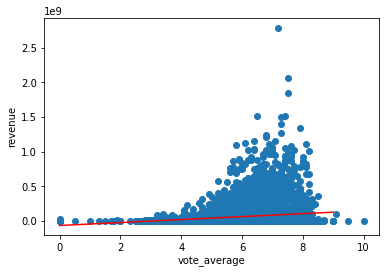

In [22]:
voteagv_rev = df[['vote_average','revenue']]
a, b = np.polyfit(voteagv_rev['vote_average'], voteagv_rev['revenue'], 1)
vot_average = np.arange(0,10,dtype = 'float')
pred_vote = a * vot_average + b
plt.scatter(x = voteagv_rev['vote_average'], y = voteagv_rev['revenue'])
plt.plot(vot_average, pred_vote, linestyle='-',color = "red")
plt.xlabel('vote_average')
plt.ylabel('revenue')

In [23]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~vote_average",voteagv_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           5.79e-37
Time:                        12:52:31   Log-Likelihood:            -1.4661e+05
No. Observations:                7254   AIC:                         2.932e+05
Df Residuals:                    7252   BIC:                         2.932e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.423e+07   1.06e+07     -6.080   

## Relation between the budget and revenue

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'revenue')

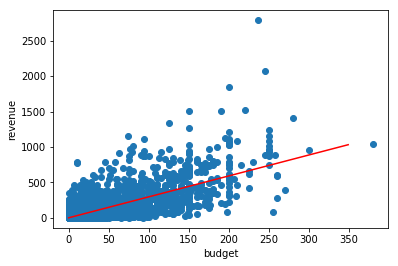

In [24]:
budget_rev = df[['budget','revenue']]
budget_rev['budget'] = budget_rev['budget']/1000000
budget_rev['revenue'] = budget_rev['revenue']/1000000
a, b = np.polyfit(budget_rev['budget'], budget_rev['revenue'], 1)
budget = np.arange(0,350,dtype = 'float')
pred_budget = a * budget + b
plt.scatter(x = budget_rev['budget'], y = budget_rev['revenue'])
plt.plot(budget, pred_budget, linestyle='-',color = "red")
plt.xlabel('budget')
plt.ylabel('revenue')

In [25]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~budget",budget_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     9108.
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:52:31   Log-Likelihood:                -43523.
No. Observations:                7254   AIC:                         8.705e+04
Df Residuals:                    7252   BIC:                         8.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9546      1.344      1.454      0.1

## Revenue Trend Over The Years

In [26]:
year_rev = df[['release_date','revenue']]
year_rev['release_date']=year_rev['release_date'].str[0:4]
year_rev['release_date'] = year_rev['release_date'].apply(int)

/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengcheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


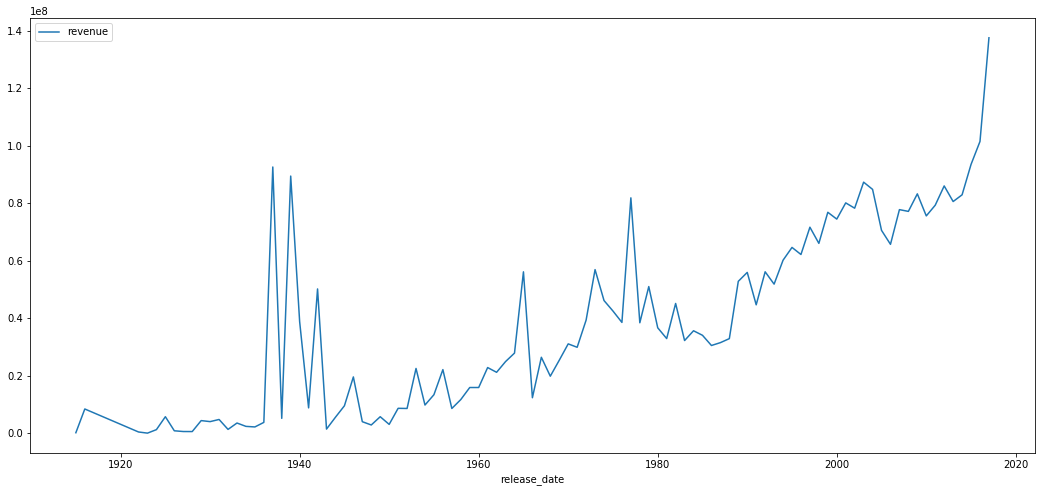

In [27]:
year = year_rev.groupby('release_date').mean()
ax = year.plot(figsize = (18, 8))

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*